# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [3]:
df.columns = df.columns.str.lower()
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [4]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [5]:
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [6]:
df['Num_Lines'] = df.groupby(['station'])['linename'].transform(len)
df.sort_values('Num_Lines', ascending=False)
df.tail()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348,252
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348,252
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348,252
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348,252
197624,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,21:00:00,REGULAR,5554,348,252


## Write a function to clean a column name

In [7]:
def clean(col_name):
    cleaned = col_name.lower()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [9]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [10]:
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')
df['day_of_wk'] = df.date.dt.day_name()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines,day_of_wk
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,2229,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,2229,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,2229,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,2229,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,2229,Saturday


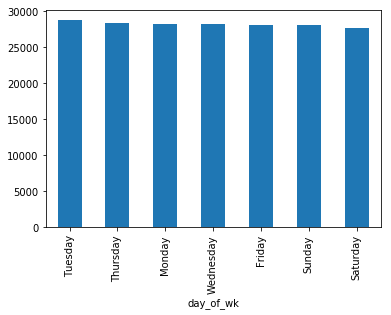

In [11]:
day_count = df.groupby(['day_of_wk']).size()
day_count_sorted = day_count.sort_values(ascending=False)
day_count_sorted.plot.bar()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [12]:
day_count

day_of_wk
Friday       28101
Monday       28254
Saturday     27767
Sunday       28081
Thursday     28447
Tuesday      28772
Wednesday    28203
dtype: int64

In [14]:
day_pct = day_count / len(df)
weekend = sum(df['day_of_wk'] == 'Saturday') + sum(df['day_of_wk'] == 'Sunday')
weekday = len(df) - weekend
(weekend / len(df))/2 > (weekday / len(df))/5 #average traffic on weekdays is higher than average traffic on weekends

False

## Drop a couple of columns

In [16]:
df = df.drop(['division'], axis = 1)
df.head()

,linename,c/a,unit,scp,station,date,time,desc,entries,exits,num_lines,day_of_wk
0,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,00:00:00,REGULAR,6736067,2283184,2229,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,04:00:00,REGULAR,6736087,2283188,2229,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,08:00:00,REGULAR,6736105,2283229,2229,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,12:00:00,REGULAR,6736180,2283314,2229,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,16:00:00,REGULAR,6736349,2283384,2229,Saturday


## Summary

Great! You practiced your data cleanup-skills using Pandas.